In [1]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class ODESolver(object):
    """Second-order ODE Solver.
    Parameters
    ------------
    omega_0 : float (initial angular velocity )
    theta_0 : float (initial angular displacement)
    eta : float (time step size )
    n_iter : int (number of steps)
         
    Attributes
    -----------
    time_ : 1d-array (Stores time values for each time step.)
    omega_ : 1d-array (Stores angular velocity values for each time step.)
    theta_ : 1d-arra (Stores angular displacement values for each time step.)
        
    Methods
    -----------
    euler(alpha): Implements the Euler algorithm for the acceleration function alpha.
    
    midpoint(alpha): Implements the Midpoint algorithm for the acceleration function alpha.
    
    verlet(alpha): Implements the Verlet algorithm for the acceleration function alpha.
    """
    def __init__(self, omega_0 = 0, theta_0 = 10, eta=0.01, n_iter=10):
        self.omega_0 = omega_0
        self.theta_0 = theta_0
        self.eta = eta
        self.n_iter = n_iter
        
    def euler(self,alpha):
        """Implements Euler Method.

        Parameters
        ----------
        alpha : acceleration function

        Returns
        -------
        self : object
        """
        self.time_ = np.zeros(self.n_iter)
        self.omega_ = np.zeros(self.n_iter)
        self.theta_ = np.zeros(self.n_iter)
        self.omega_[0] = self.omega_0
        self.theta_[0] = self.theta_0*np.pi/180.0

        for i in range(self.n_iter-1):
            self.time_[i+1] = self.time_[i] + self.eta
            self.omega_[i+1] = self.omega_[i] + self.eta*alpha(self.theta_[i])
            self.theta_[i+1] = self.theta_[i] + self.eta*self.omega_[i]
        return self

    def midpoint(self,alpha):
        """Implement Midpoint Method.

        Parameters
        ----------
        alpha : acceleration function
     
         Returns
         -------
         self : object
         """
        self.time_ = np.zeros(self.n_iter)
        self.omega_ = np.zeros(self.n_iter)
        self.theta_ = np.zeros(self.n_iter)
        self.omega_[0] = self.omega_0
        self.theta_[0] = self.theta_0*np.pi/180.0

        for i in range(self.n_iter-1):
            self.time_[i+1] = self.time_[i] + self.eta
            self.omega_[i+1] = self.omega_[i] + self.eta*alpha(self.theta_[i])
            self.theta_[i+1] = self.theta_[i] + 0.5*self.eta*(self.omega_[i]+self.omega_[i+1])
        return self

    def verlet(self,alpha):
        """Implement Verlet Method.

        Parameters
        ----------
        alpha : acceleration function
        Returns
        -------
        self : object
        """
        self.time_ = np.zeros(self.n_iter)
        self.theta_ = np.zeros(self.n_iter)
        self.theta_[0] = self.theta_0*np.pi/180.0
        self.time_[1]= self.eta
        self.theta_[1] = self.theta_[0]+self.omega_0*self.eta +0.5* (self.eta**2)*alpha(self.theta_[0])

        for i in range(self.n_iter-2):
            self.time_[i+2] = self.time_[i+1] + self.eta
            self.theta_[i+2] = 2.0*self.theta_[i+1] -self.theta_[i] + (self.eta**2)*alpha(self.theta_[i+1])
        return self


In [3]:
# define Angular accelaration function
def alpha(x):
    return -np.sin(x)

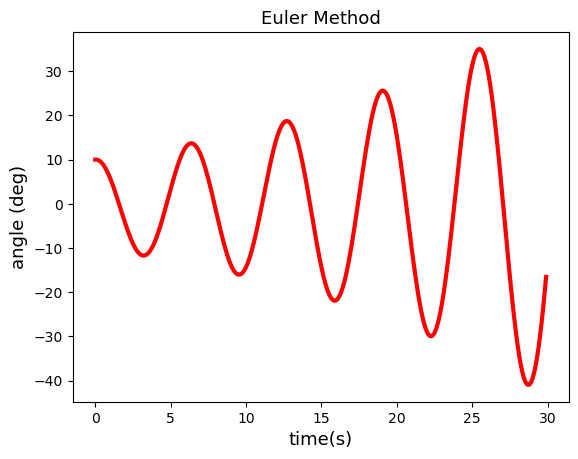

In [4]:
# Euler Method
time=ODESolver(omega_0 = 0, theta_0 = 10, eta=0.1, n_iter=300).euler(alpha).time_
theta=ODESolver(omega_0 = 0, theta_0 = 10, eta=0.1, n_iter=300).euler(alpha).theta_
plt.plot(time,theta*180/np.pi,lw=3,color='red')
plt.xlabel('time(s)',size=13)
plt.ylabel('angle (deg)',size=13)
plt.title('Euler Method',size=13)
plt.show()


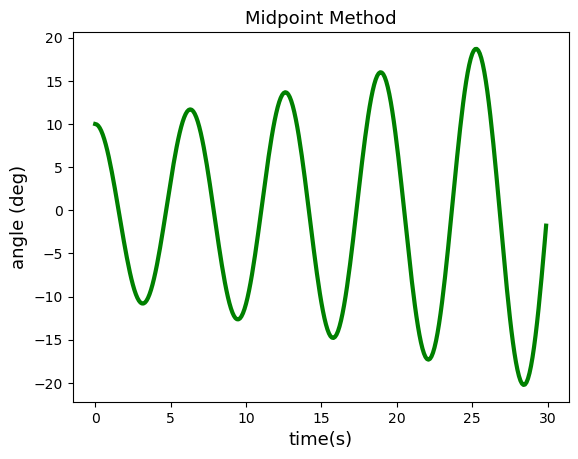

In [5]:
# Mid Point Method
time=ODESolver(omega_0 = 0, theta_0 = 10, eta=0.1, n_iter=300).midpoint(alpha).time_
theta=ODESolver(omega_0 = 0, theta_0 = 10, eta=0.1, n_iter=300).midpoint(alpha).theta_
plt.plot(time,theta*180/np.pi,lw=3,color='green')
plt.xlabel('time(s)',size=13)
plt.ylabel('angle (deg)',size=13)
plt.title('Midpoint Method',size=13)
plt.show()

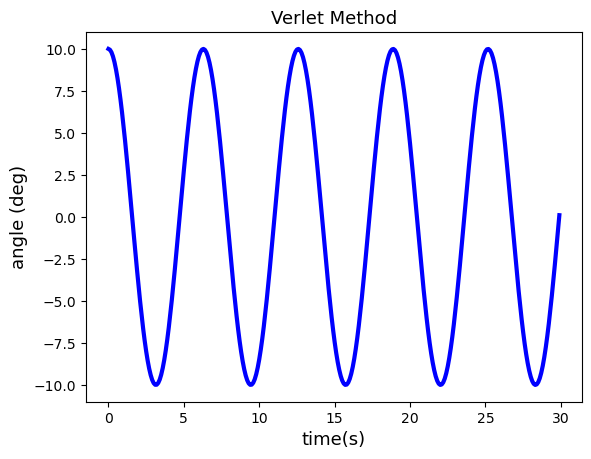

In [6]:
# Verlet Method
time=ODESolver(omega_0 = 0, theta_0 = 10, eta=0.1, n_iter=300).verlet(alpha).time_
theta=ODESolver(omega_0 = 0, theta_0 = 10, eta=0.1, n_iter=300).verlet(alpha).theta_
plt.plot(time,theta*180/np.pi,lw=3,color='blue')
plt.xlabel('time(s)',size=13)
plt.ylabel('angle (deg)',size=13)
plt.title('Verlet Method',size=13)
plt.show()
